In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
    
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2022/train.csv
/kaggle/input/tabular-playground-series-mar-2022/test.csv


In [2]:
train = pd.read_csv('../input/tabular-playground-series-mar-2022/train.csv',index_col='row_id')
test = pd.read_csv('../input/tabular-playground-series-mar-2022/test.csv',index_col=['row_id'])
train
# help(pd.read_csv)

,time,x,y,direction,congestion
row_id,,,,,
0,1991-04-01 00:00:00,0,0,EB,70
1,1991-04-01 00:00:00,0,0,NB,49
2,1991-04-01 00:00:00,0,0,SB,24
3,1991-04-01 00:00:00,0,1,EB,18
4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,3,NB,54
848831,1991-09-30 11:40:00,2,3,NE,28
848832,1991-09-30 11:40:00,2,3,SB,68


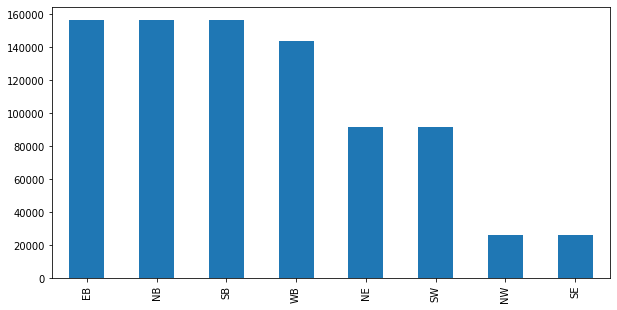

In [3]:
plt.figure(figsize=[10,5])
train['direction'].value_counts().plot.bar()
plt.show()

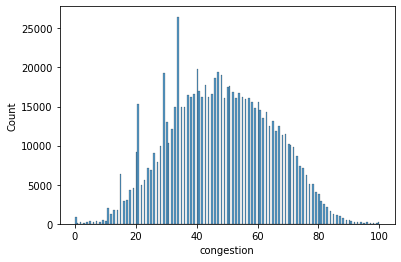

In [4]:
sns.histplot(train.congestion,kde=False)
plt.show()

In [5]:
train['time'] = pd.to_datetime(train['time'])
train['weekday'] = train['time'].dt.weekday
train['hour'] = train['time'].dt.hour
train['minute'] = train['time'].dt.minute
train

,time,x,y,direction,congestion,weekday,hour,minute
row_id,,,,,,,,
0,1991-04-01 00:00:00,0,0,EB,70,0,0,0
1,1991-04-01 00:00:00,0,0,NB,49,0,0,0
2,1991-04-01 00:00:00,0,0,SB,24,0,0,0
3,1991-04-01 00:00:00,0,1,EB,18,0,0,0
4,1991-04-01 00:00:00,0,1,NB,60,0,0,0
...,...,...,...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,3,NB,54,0,11,40
848831,1991-09-30 11:40:00,2,3,NE,28,0,11,40
848832,1991-09-30 11:40:00,2,3,SB,68,0,11,40


In [6]:
train = pd.get_dummies(train)
train = train.drop(columns=['time'])
train

,x,y,congestion,weekday,hour,minute,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,direction_SW,direction_WB
row_id,,,,,,,,,,,,,,
0,0,0,70,0,0,0,1,0,0,0,0,0,0,0
1,0,0,49,0,0,0,0,1,0,0,0,0,0,0
2,0,0,24,0,0,0,0,0,0,0,1,0,0,0
3,0,1,18,0,0,0,1,0,0,0,0,0,0,0
4,0,1,60,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,2,3,54,0,11,40,0,1,0,0,0,0,0,0
848831,2,3,28,0,11,40,0,0,1,0,0,0,0,0
848832,2,3,68,0,11,40,0,0,0,0,1,0,0,0


In [7]:
# fig, ax = plt.subplots(figsize=(6,6))
# ax.plot(grpbypos.loc[grpbypos['x']==0,'y'],grpbypos.loc[grpbypos['x']==0,'congestion'])
# ax.plot(grpbypos.loc[grpbypos['x']==1,'y'],grpbypos.loc[grpbypos['x']==1,'congestion'])
# ax.plot(grpbypos.loc[grpbypos['x']==2,'y'],grpbypos.loc[grpbypos['x']==2,'congestion'])

In [8]:
# fig, ax = plt.subplots(figsize=(6, 6))
# ax.scatter(X[''])
# plt.scatter(X.index,X['congestion'].values)
# colors = {'EB':'blue','NB':'orange','NE':'red','NW':'green','SB':'pink','SE':'brown','SW':'purple','WB':'black'}

In [9]:
Y = train.pop('congestion')
X = train.copy()

In [10]:
# sns.jointplot('x','y',train)

In [11]:
# sns.jointplot('x','y',grpbypos)

In [12]:
# fig, ax = plt.subplots(figsize=(6, 6))
# ax.scatter(X['time'], X['congestion'], c=X['direction'].map(colors).values)
# X['direction'].map(colors).values
# X['congestion']

In [13]:
# from matplotlib import dates
# X['datenum'] = dates.datestr2num(X['time'])
# X

In [14]:
# X.groupby(['datenum','direction']).sum()

In [15]:
# import seaborn as sns
# # {'EB':'blue','NB':'orange','NE':'red','NW':'green','SB':'pink','SE':'brown','SW':'purple','WB':'black'}
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='EB'],hue='direction')

In [16]:
# {'EB':'blue','NB':'orange','NE':'red','NW':'green','SB':'pink','SE':'brown','SW':'purple','WB':'black'}
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='EB'],hue='direction')
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='NB'],hue='direction')
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='NE'],hue='direction')
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='NW'],hue='direction')
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='SB'],hue='direction')
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='SE'],hue='direction')
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='SW'],hue='direction')
# sns.lmplot(x='datenum',y='congestion',data=X[X['direction']=='WB'],hue='direction')

In [17]:
# sns.lmplot(x='x',y='y',data=train.groupby(['x','y']).sum().reset_index())

In [18]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression

# def select_features(X_train, y_train):
#     fs = SelectKBest(score_func=f_regression, k='all')
#     fs.fit(X_train, y_train)
#     X_train_fs = fs.transform(X_train)
# #     X_test_fs = fs.transform(X_test)
#     return X_train_fs, fs
 

In [19]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_train = scaler.fit_transform(train.drop(columns=['time','direction']))

In [20]:
# train.loc[:,'x']=scaled_train[:,0]
# train.loc[:,'y']=scaled_train[:,1]
# train.loc[:,'congestion']=scaled_train[:,2]
# train

In [21]:
# sc = StandardScaler()
# scaled_test = sc.fit_transform(test.drop(columns=['time','direction']))
# test.loc[:,'x']=scaled_test[:,0]
# test.loc[:,'y']=scaled_test[:,1]
# test

In [22]:
# print(train.loc[65:,'congestion'].values)
# print(lag['lag_1'].dropna().values)
# print(len(lag))
# X_ = train
# X_

In [23]:
# X_['time'].unique()

In [24]:
# def make_lags(df,lags):
#     return pd.concat({
#         f'lag_{i}':df['congestion'].shift(i*65)
#         for i in range(1, lags+1)
#     },
#     axis=1
#     )

In [25]:
# lags = make_lags(X_,10)
# lags

In [26]:
# X = pd.concat([X_,lags],axis=1)
# X

In [27]:
# train = X.iloc[:848835]
# test = X.iloc[848835:]

In [28]:
# test

In [29]:
# train.loc[:,'congestion'] = scaler.inverse_transform(train[['x','y','congestion']])[:,2]
# train

In [30]:
# train = train.dropna()
# train = train.drop(columns=['time'])
# train

In [31]:
# test = test.drop(columns=['time','congestion'])
# test

In [32]:
# X_train_fs, fs = select_features(train.drop(columns=['congestion','direction']),train['congestion'])

In [33]:
# fs.scores_
# train = pd.get_dummies(train,columns=['direction'],prefix='direction')

In [34]:
# X = train.copy()
# y = X.pop('congestion')

# X_encode = X.sample(frac=0.25)
# y_encode = y[X_encode.index]
# X_pretrain = X.drop(X_encode.index)
# y_train = y[X_pretrain.index]

In [35]:
# from category_encoders import MEstimateEncoder
# encoder = MEstimateEncoder(cols=["direction"], m=5.0)
# encoder.fit(X_encode, y_encode)
# X_train = encoder.transform(X_pretrain)

In [36]:
# X_train['direction'].unique()

In [37]:
# plt.scatter(lag['lag_10'].dropna().values,train.loc[650:,'congestion'].values)
# train = pd.get_dummies(train,columns=['direction'],prefix='direction')
# test = pd.get_dummies(test,columns=['direction'],prefix='direction')

In [38]:
# pd.concat([train,lag],axis=0)
# train

In [39]:
# X = pd.concat([train,lag],axis=1).drop(columns=['time'])

In [40]:
# X = train.dropna()
# Y = X.pop('congestion')

In [41]:
# train = X
# X

In [42]:
# X = encoder.transform(X)

In [43]:
import xgboost as xg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, Y,
                      test_size = 0.3, random_state = 123)

In [45]:
test_X

,x,y,weekday,hour,minute,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,direction_SW,direction_WB
row_id,,,,,,,,,,,,,
744862,1,2,5,18,40,1,0,0,0,0,0,0,0
164502,2,2,0,8,0,0,1,0,0,0,0,0,0
686089,0,3,0,0,40,0,0,0,0,1,0,0,0
197179,1,3,0,7,40,0,1,0,0,0,0,0,0
615470,2,1,5,20,20,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315369,2,2,4,14,20,0,0,0,1,0,0,0,0
201608,2,1,1,6,20,1,0,0,0,0,0,0,0
92857,1,3,5,20,20,0,0,0,0,0,0,1,0


In [46]:
# xgb_r = xg.XGBRegressor(learning_rate = 0.1,
#                            n_estimators  = 10,
#                            max_depth     = 20,
#                            eval_metric='mae')
# xgb_r.fit(train_X, train_y)

In [47]:
# pred = xgb_r.predict(test_X)
# mean_absolute_error(test_y, pred)

<AxesSubplot:>

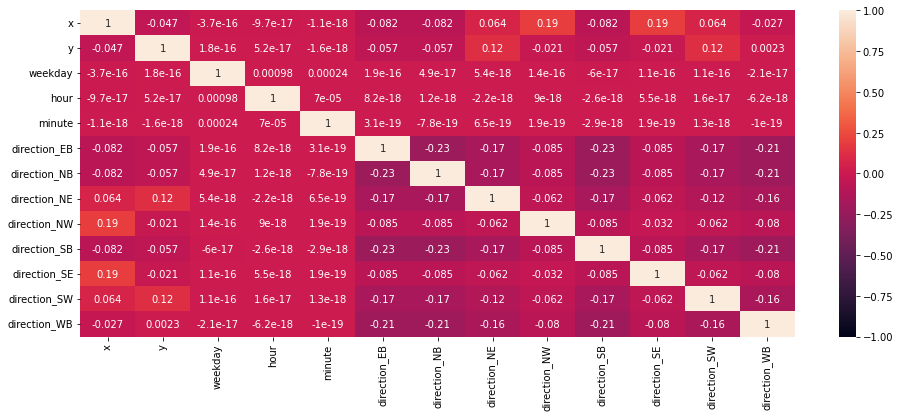

In [48]:
plt.figure(figsize=(16, 6))
sns.heatmap(X.corr(),vmin=-1,vmax=1,annot=True)

In [49]:
# exg = xg.XGBRegressor(verbosity=0, random_state=123)
# params = {'n_estimators': [100, 150, 200, 300]}
# cv_exg_model = GridSearchCV(estimator=exg, param_grid=params, n_jobs=10, cv=10)
# cv_exg_model.fit(train_X, train_y)

In [50]:
# pred = cv_exg_model.predict(features_valid)

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=123)
model.fit(train_X, train_y)

RandomForestRegressor(max_depth=20, n_estimators=60, random_state=123)

In [53]:
pred = model.predict(test_X)

In [54]:
mean_absolute_error(test_y, pred)

6.338174810401299

In [55]:
# scaler.inverse_transform(pd.DataFrame(test_y.values.reshape(-1,1)))
# train = pd.read_csv('../input/tabular-playground-series-mar-2022/train.csv',index_col='row_id')
# train

In [56]:
# scaler.fit_transform(train.drop(columns=['time','direction']))

In [57]:
test['time'] = pd.to_datetime(test['time'])
test['weekday'] = test['time'].dt.weekday
test['hour'] = test['time'].dt.hour
test['minute'] = test['time'].dt.minute

In [58]:
# test = pd.read_csv('../input/tabular-playground-series-mar-2022/test.csv',index_col=['row_id'])
test = pd.get_dummies(test)
test = test.drop(columns=['time'])
test

,x,y,weekday,hour,minute,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,direction_SW,direction_WB
row_id,,,,,,,,,,,,,
848835,0,0,0,12,0,1,0,0,0,0,0,0,0
848836,0,0,0,12,0,0,1,0,0,0,0,0,0
848837,0,0,0,12,0,0,0,0,0,1,0,0,0
848838,0,1,0,12,0,1,0,0,0,0,0,0,0
848839,0,1,0,12,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
851170,2,3,0,23,40,0,1,0,0,0,0,0,0
851171,2,3,0,23,40,0,0,1,0,0,0,0,0
851172,2,3,0,23,40,0,0,0,0,1,0,0,0


In [59]:
# model.predict(test)

In [60]:
submission = pd.read_csv('../input/tabular-playground-series-mar-2022/sample_submission.csv')
submission['congestion'] = model.predict(test)

In [61]:
submission.to_csv('submission.csv',index=False)
# submission

In [62]:
# submission